<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r11-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [ ]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-1-r11.csv?token=AKVFSOH4TC4IY3N4CSRVFYK63JDDO')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-11-r11.csv?token=AKVFSOBY5KWVYP7MVPVLSKS63JDDQ')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-4-m-1-r11.csv?token=AKVFSOBOPZXRIHTY75257K263JDDW')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-4-m-11-r11.csv?token=AKVFSOBNHAMMTIEDLLG2S3263JDD4')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-6-m-1-r11.csv?token=AKVFSOGJEWMJIC34XUWDJNC63JDD6')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-6-m-11-r11.csv?token=AKVFSOGFKJBHUH2ZJR6X7T263JDEG')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-9-m-1-r11.csv?token=AKVFSOB3MTPMSXHBLAMI76S63JDEI')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-9-m-11-r11.csv?token=AKVFSOCLQ3I32KFGCMKCY5K63JDEO')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-normal-n-0-15-r11.csv?token=AKVFSOCYILXP5XA4GGQEKYC63JDES')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-normal-n-0-4-r11.csv?token=AKVFSOE54EDO56EYFZTHU5K63JDEY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-normal-n-0-6-r11.csv?token=AKVFSOFOZ3U36V47XBCSAQ263JDE4')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-normal-n-0-9-r11.csv?token=AKVFSOBWYIQ5T5PELBMMN7S63JDFA')

In [14]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(88528, 26)
(140275, 26)
(61733, 26)
(113728, 26)
(61720, 26)
(113852, 26)
(66468, 26)
(118665, 26)
(67772, 26)
(40960, 26)
(40960, 26)
(45712, 26)


In [ ]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r11-train.csv',index=False)

In [16]:
df = pd.read_csv('fft-r11-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,11,11,23,7,3,1,0,0.0,4,84,1,84,84,0,12,3,27,0
1,7,3,0,1,1,4,3,9,11,11,23,7,2,1,0,0.0,4,131,1,131,131,0,8,3,27,0
2,7,3,0,1,1,4,3,9,11,11,23,7,3,1,0,0.0,4,84,1,84,84,0,12,3,27,0
3,7,3,0,1,1,4,3,9,11,11,23,7,3,1,0,0.0,4,87,1,87,87,0,12,3,27,0
4,11,3,1,1,1,4,3,9,15,15,23,7,3,2,1,0.5,8,130,2,131,260,3,12,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960368,3276921,4,0,6,3,2,3,11,27,11,24,8,30095,3,0,0.0,18,5,45,49,225,0,1083420,18,198,0
960369,3276928,4,0,6,4,2,3,11,27,11,24,8,30095,3,0,0.0,25,4,46,49,184,0,1444560,18,198,0
960370,3276935,4,0,6,5,3,3,11,27,11,24,8,30095,3,0,0.0,32,3,47,49,141,0,2708550,18,198,0
960371,3276936,4,0,2,1,4,3,12,27,11,24,8,30096,3,0,0.0,32,2,48,49,96,0,240768,6,72,0


In [17]:
df.shape

(960373, 26)

Test Data

In [ ]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-12-r11.csv?token=AKVFSODFX632MJC3CW5FU7S63JEEK')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-7-r11.csv?token=AKVFSOGYGNPHWB42VH7Q2GK63JEEQ')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-4-m-12-r11.csv?token=AKVFSOFZ6KJEJ26DEU6UFHS63JEES')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-4-m-7-r11.csv?token=AKVFSOER2UFUJ5R5M2LN2B263JEEW')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-6-m-12-r11.csv?token=AKVFSOB57H6WKTXOY4DPBX263JEE2')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-6-m-7-r11.csv?token=AKVFSOCLQ35HXGV32FCHFJ263JEE6')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-9-m-12-r11.csv?token=AKVFSOCTWJFN5PAITIQQD7S63JEFE')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-9-m-7-r11.csv?token=AKVFSOHI6JNCK4OP4LHGZOS63JEFI')

In [19]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(91737, 26)
(96751, 26)
(64634, 26)
(70016, 26)
(64642, 26)
(69959, 26)
(69491, 26)
(74860, 26)


In [20]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,753,0,1,2,1,4,3,9,30,14,27,11,25,2,2,1.0,12,29,1,29,29,0,200,6,54,0
1,792,4,0,3,1,4,3,9,27,11,30,14,25,2,0,0.0,4,28,2,29,56,0,300,9,81,0
2,793,4,0,4,1,1,5,17,27,11,6,6,25,2,0,0.0,5,27,3,29,81,0,100,20,340,0
3,794,4,0,4,2,2,5,17,27,11,6,6,25,2,0,0.0,6,26,4,29,104,0,400,20,340,0
4,795,4,0,4,3,2,5,17,27,11,6,6,25,2,0,0.0,7,25,5,29,125,0,600,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61715,3265449,4,0,3,1,4,3,10,27,11,30,14,30080,2,0,0.0,5,5,21,25,105,0,360960,9,90,0
61716,3265450,4,0,4,2,2,5,17,27,11,0,0,30080,5,0,0.0,6,4,22,25,88,0,481280,20,340,0
61717,3265451,4,0,4,3,2,5,17,27,11,0,0,30080,5,0,0.0,7,3,23,25,69,0,721920,20,340,0
61718,3265452,4,0,4,4,2,5,17,27,11,0,0,30080,5,0,0.0,8,2,24,25,48,0,962560,20,340,0


Processing

In [21]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [ ]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [23]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.586652,-0.158326,0.005864,-0.009051,0.128049,0.247906,-0.009271,0.247522,-0.687877,-0.866207,-0.426832,-0.055510,0.012033,-0.032503,-0.027692,0.001140,-0.044524,-0.036134,0.151372,0.009033
inport,-0.586652,1.000000,-0.014303,-0.004865,0.007503,0.082495,-0.053757,-0.023896,0.228304,0.731355,0.701245,0.323981,0.012904,-0.039434,-0.019834,-0.018410,0.506315,-0.029128,0.053146,-0.003429,0.018532
cache_coherence_type,-0.158326,-0.014303,1.000000,0.257657,-0.397577,-0.282789,-0.331443,0.038627,-0.058124,0.104727,0.200364,-0.049009,0.024615,-0.036262,-0.008707,-0.005062,-0.044348,0.311297,0.646557,0.050045,0.008653
flit_id,0.005864,-0.004865,0.257657,1.000000,0.023104,0.186072,0.152356,0.003081,0.027244,0.001419,-0.003510,0.309405,-0.021816,0.020756,-0.000793,-0.001104,0.012707,0.660649,0.372528,0.275900,-0.000860
flit_type,-0.009051,0.007503,-0.397577,0.023104,1.000000,-0.287096,-0.235075,-0.004775,-0.042050,-0.002199,0.005416,0.362772,-0.026394,0.029043,0.001980,0.002690,-0.019601,0.151433,-0.574811,-0.425706,0.001315
vnet,0.128049,0.082495,-0.282789,0.186072,-0.287096,1.000000,0.968101,-0.048354,0.112358,-0.144502,-0.211144,-0.474126,-0.043771,0.049011,0.003917,-0.002784,-0.010011,-0.074032,0.548888,0.932314,-0.000441
vc,0.247906,-0.053757,-0.331443,0.152356,-0.235075,0.968101,1.000000,-0.043987,0.095730,-0.264180,-0.347668,-0.513783,-0.043520,0.059381,0.011858,0.004472,-0.061548,-0.091166,0.481117,0.919125,-0.006093
traversal_id,-0.009271,-0.023896,0.038627,0.003081,-0.004775,-0.048354,-0.043987,1.000000,-0.017730,-0.002414,-0.001753,0.032037,0.162240,0.163225,0.243312,0.182428,-0.054439,0.535471,-0.004795,-0.034371,-0.238579
hop_count,0.247522,0.228304,-0.058124,0.027244,-0.042050,0.112358,0.095730,-0.017730,1.000000,0.436641,0.026696,0.188211,-0.075949,-0.080684,-0.117096,-0.100124,0.230837,-0.021130,0.038709,0.089790,0.088156
current_hop,-0.687877,0.731355,0.104727,0.001419,-0.002199,-0.144502,-0.264180,-0.002414,0.436641,1.000000,0.815660,0.605426,0.003859,-0.078766,-0.055999,-0.047134,0.243311,0.028494,-0.023660,-0.187273,0.045421


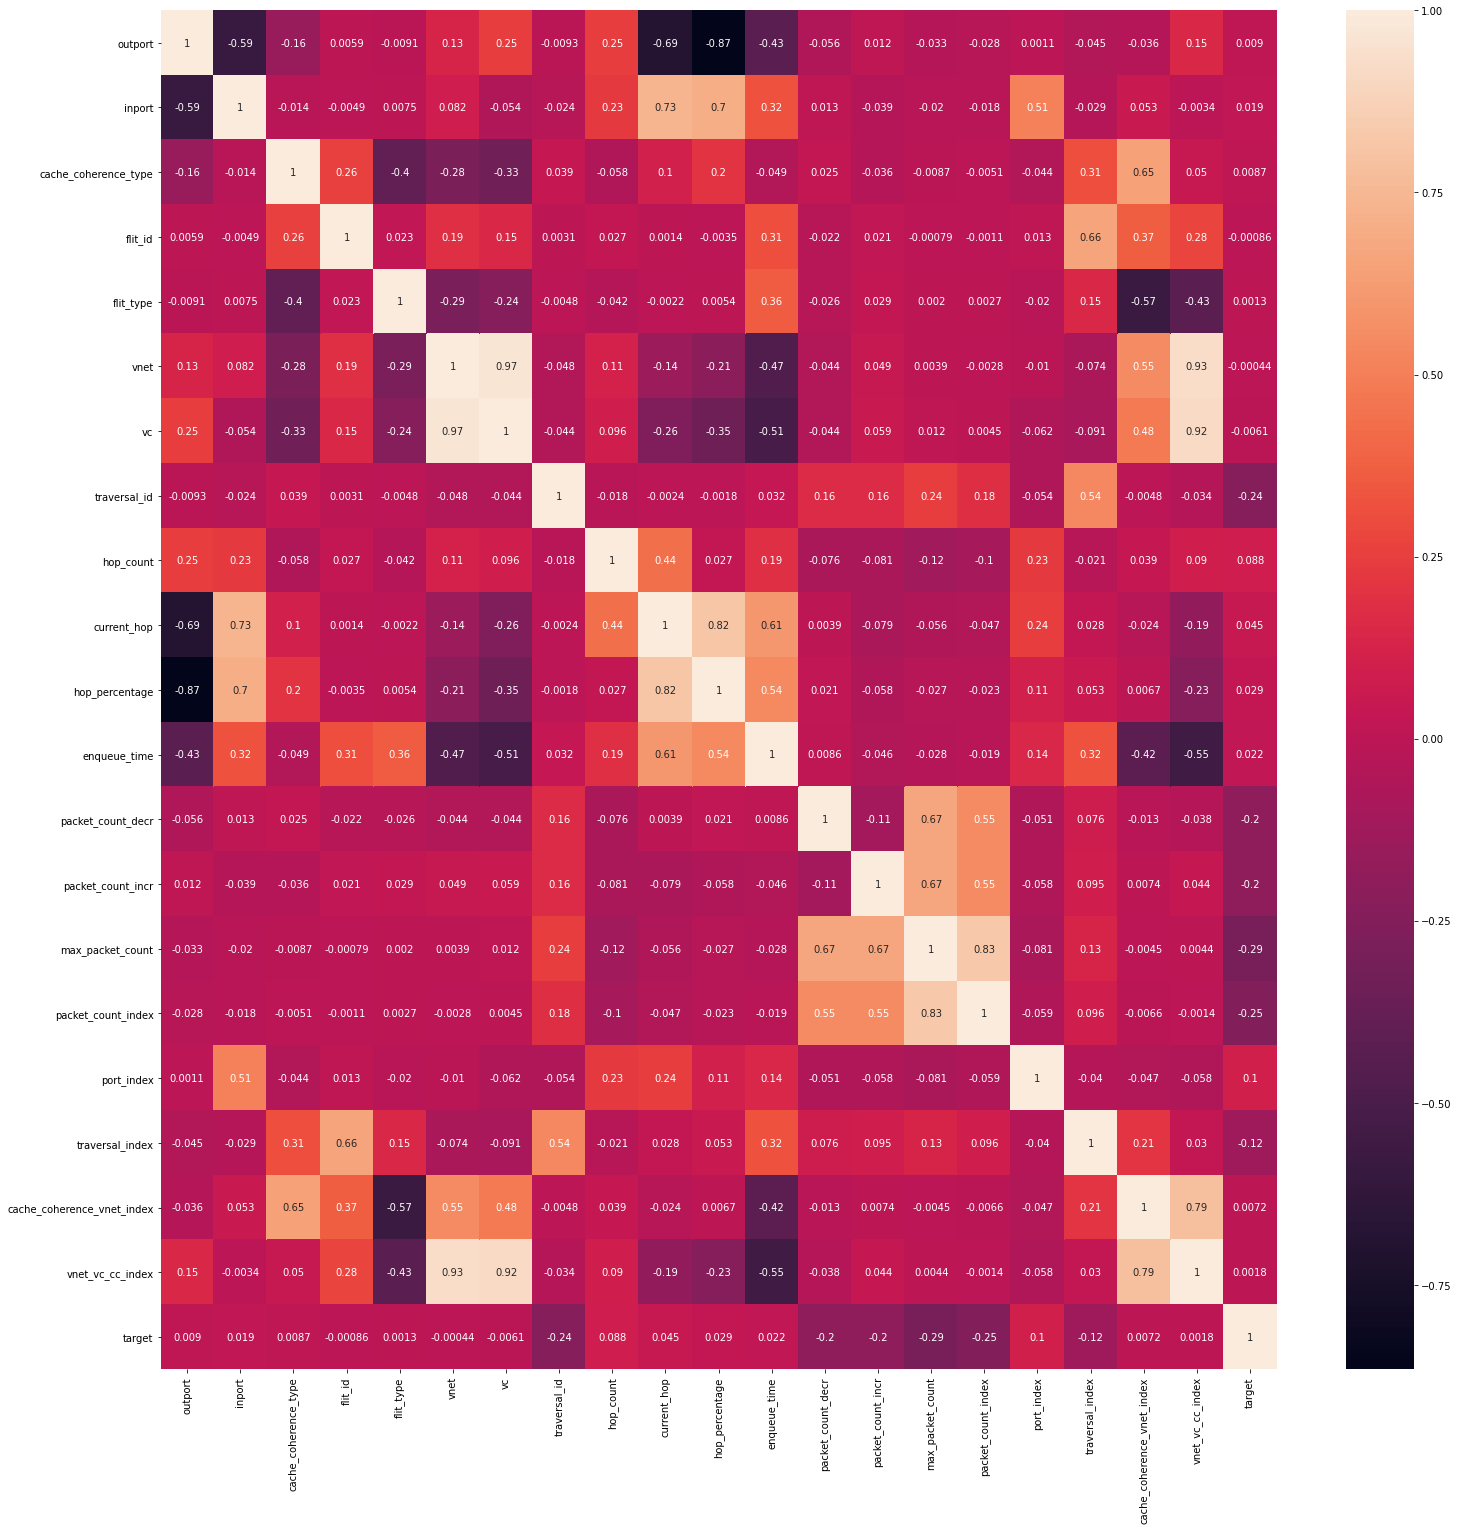

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [26]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [ ]:
#df = df.drop(columns=[''])

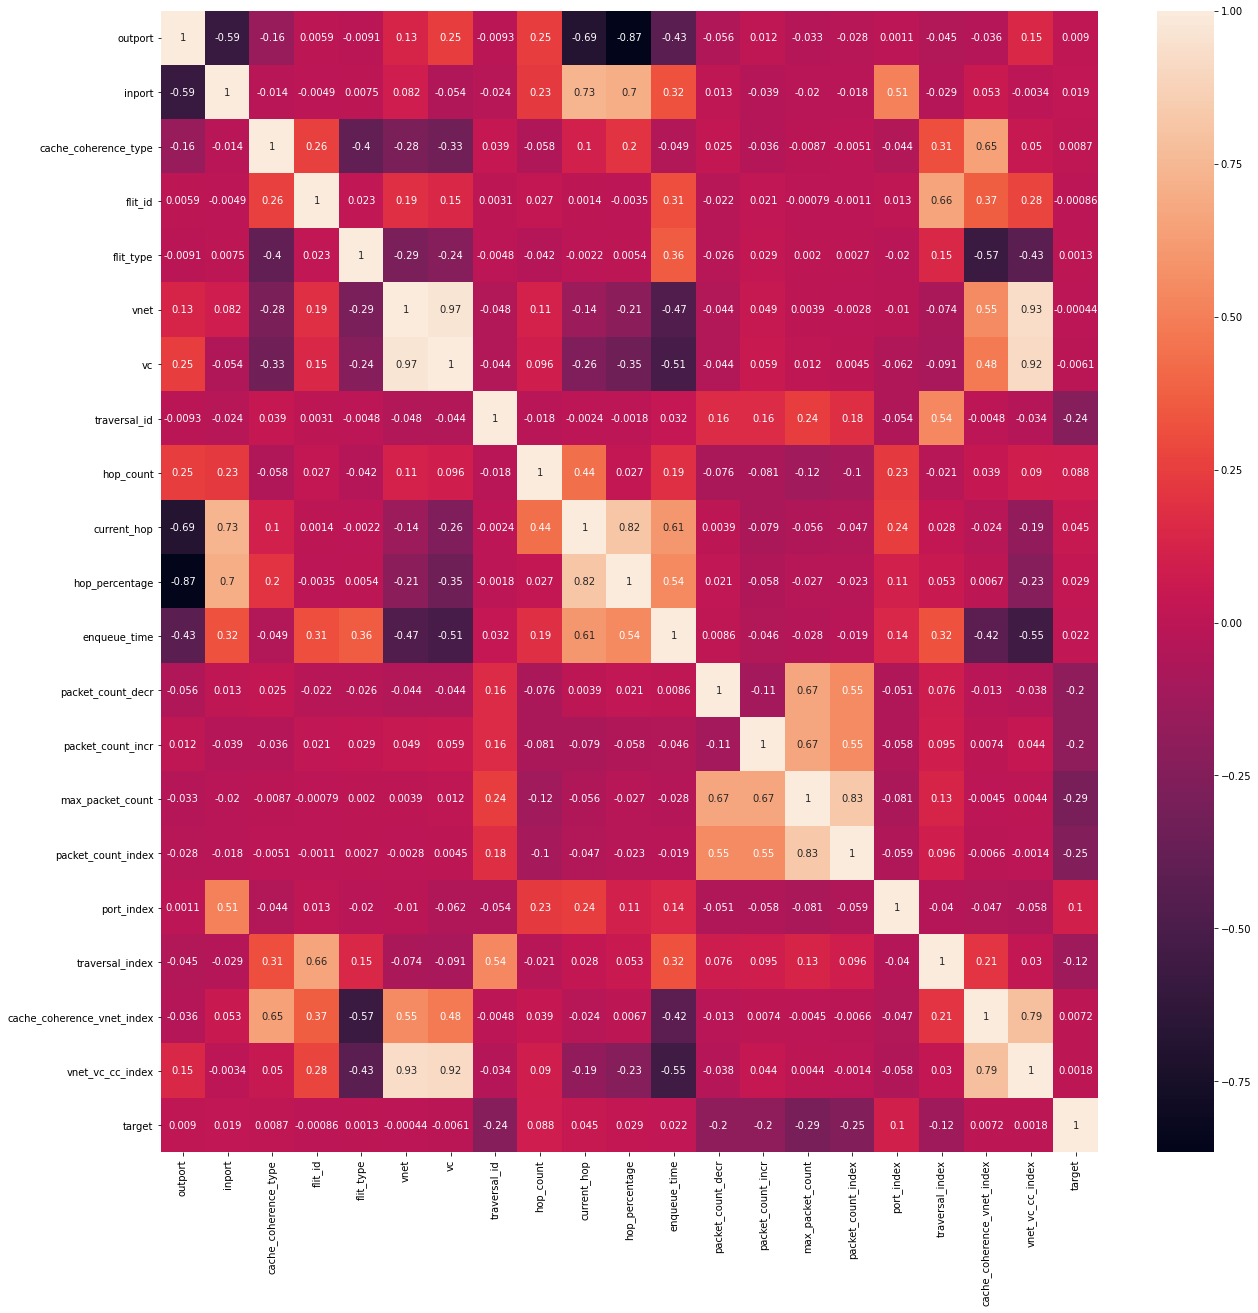

In [28]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

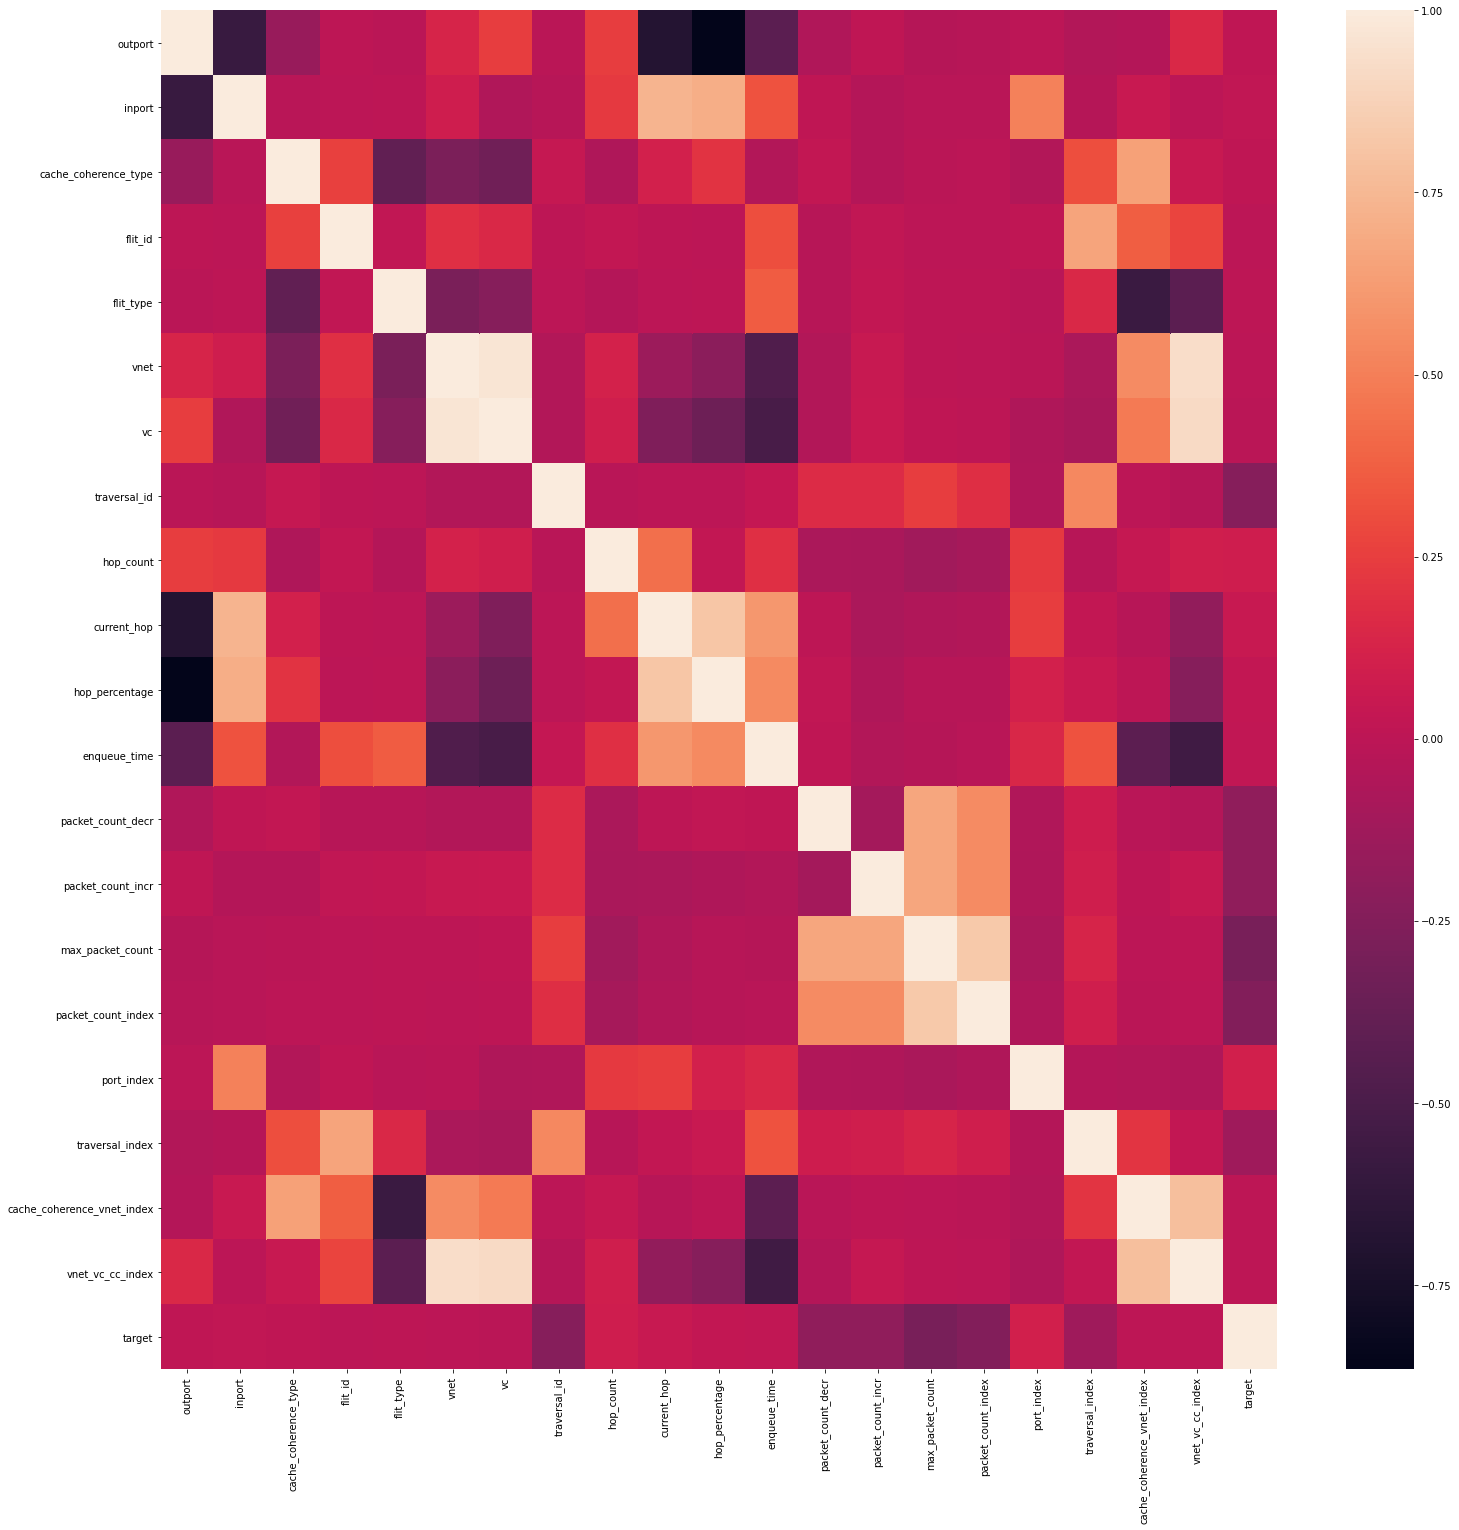

In [29]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [ ]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [31]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.0,0.0,0.000000,0.387850,0.000000,0.387850,0.007117,0.00,0.000001,0.000000,0.000000
1,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.000000,0.607477,0.000000,0.607477,0.011146,0.00,0.000000,0.000000,0.000000
2,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.0,0.0,0.000000,0.387850,0.000000,0.387850,0.007117,0.00,0.000001,0.000000,0.000000
3,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.0,0.0,0.000000,0.401869,0.000000,0.401869,0.007374,0.00,0.000001,0.000000,0.000000
4,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.333333,0.2,0.5,0.055556,0.602804,0.004673,0.607477,0.022207,0.25,0.000001,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960368,1.00,0.00,0.833333,0.50,0.333333,0.0,0.181818,0.999967,0.500000,0.0,0.0,0.194444,0.018692,0.205607,0.224299,0.019206,0.00,0.399998,0.833333,0.458445
960369,1.00,0.00,0.833333,0.75,0.333333,0.0,0.181818,0.999967,0.500000,0.0,0.0,0.291667,0.014019,0.210280,0.224299,0.015691,0.00,0.533332,0.833333,0.458445
960370,1.00,0.00,0.833333,1.00,0.666667,0.0,0.181818,0.999967,0.500000,0.0,0.0,0.388889,0.009346,0.214953,0.224299,0.012004,0.00,1.000000,0.833333,0.458445
960371,1.00,0.00,0.166667,0.00,1.000000,0.0,0.272727,1.000000,0.500000,0.0,0.0,0.388889,0.004673,0.219626,0.224299,0.008145,0.00,0.088889,0.166667,0.120643


In [32]:
train_X[train_X.duplicated()].shape

(4586, 20)

In [33]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.2,0.2,0.5,0.056338,0.429379,0.000000,0.429379,0.009489,0.75,0.000001,0.000000,0.000000
1,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.8,0.8,0.225352,0.423729,0.005650,0.429379,0.018854,0.75,0.000000,0.000000,0.000000
2,0.25,0.75,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.2,0.2,0.5,0.056338,0.418079,0.011299,0.429379,0.027969,0.75,0.000001,0.944444,0.839142
3,0.25,0.75,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.2,0.2,0.5,0.070423,0.412429,0.016949,0.429379,0.036834,0.75,0.000015,0.944444,0.839142
4,0.25,0.75,0.500000,0.50,0.333333,1.0,0.727273,0.000033,0.2,0.2,0.5,0.084507,0.406780,0.022599,0.429379,0.045449,0.75,0.000024,0.944444,0.839142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91732,0.25,0.75,0.500000,0.50,0.333333,1.0,0.727273,0.999967,0.2,0.2,0.5,0.084507,0.022599,0.152542,0.175141,0.017355,0.75,0.266744,0.944444,0.839142
91733,0.25,0.75,0.500000,0.75,0.333333,1.0,0.727273,0.999967,0.2,0.2,0.5,0.098592,0.016949,0.158192,0.175141,0.014359,0.75,0.355660,0.944444,0.839142
91734,0.25,0.75,0.500000,1.00,0.666667,1.0,0.727273,0.999967,0.2,0.2,0.5,0.154930,0.011299,0.163842,0.175141,0.011112,0.75,0.666865,0.944444,0.839142
91735,0.00,0.25,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.0,0.2,1.0,0.056338,0.005650,0.169492,0.175141,0.007616,0.00,0.055571,0.666667,0.289544


In [34]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [35]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [36]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [37]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [38]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [39]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [40]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [42]:
train_Y = df['target']
train_Y.value_counts()

0    764969
1    195404
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [ ]:
seed = 5
np.random.seed(seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  8254.788949
15          packet_count_index  7321.281341
7                 traversal_id  7141.018767
13           packet_count_incr  4130.778659
12           packet_count_decr  4124.012761
16                  port_index  3307.790578
17             traversal_index  2215.237974
8                    hop_count   709.065206
9                  current_hop   585.280367
10              hop_percentage   291.276957
1                       inport   104.950536
11                enqueue_time    55.596235
0                      outport    29.488180
6                           vc    13.217211
2         cache_coherence_type     5.236659
18  cache_coherence_vnet_index     3.462115
4                    flit_type     0.598208


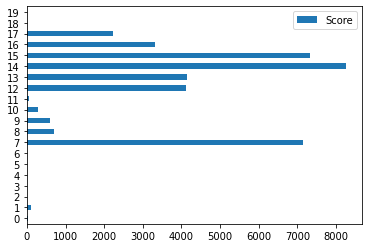

In [45]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [ ]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
pickle.dump(dt, open("dt-r11.pickle.dat", 'wb'))

In [ ]:
y_pred_dt= dt.predict(X_test)

In [50]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.8467912190322
Test Prediction Score 94.01431732396199


In [51]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 88.31442057185215
Test Prediction Score 89.49468222550672
Test Prediction Score 89.02435250796795
Test Prediction Score 88.61260283363802
Test Prediction Score 88.23675010055382
Test Prediction Score 87.3068511556769
Test Prediction Score 88.57405995020939
Test Prediction Score 87.84798290141597


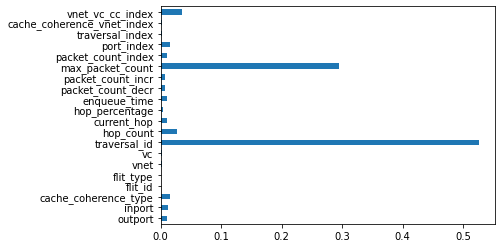

In [52]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

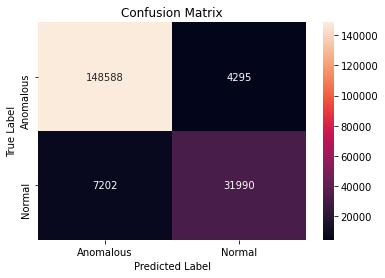

In [53]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    152883
           1       0.88      0.82      0.85     39192

    accuracy                           0.94    192075
   macro avg       0.92      0.89      0.91    192075
weighted avg       0.94      0.94      0.94    192075



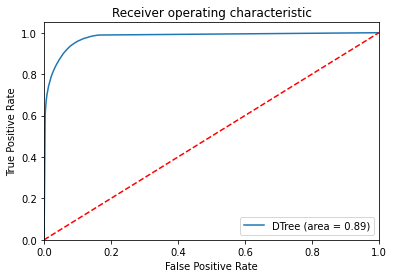

In [55]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [57]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pickle.dump(xgbc, open("xgbc-r11.pickle.dat", 'wb'))

In [ ]:
y_pred_xgbc= xgbc.predict(X_test)

In [67]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.9772223798578
Test Prediction Score 99.71365352076012


In [68]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 92.03483872374288
Test Prediction Score 93.90703972051968
Test Prediction Score 91.32035770647028
Test Prediction Score 92.21463665447898
Test Prediction Score 90.70728009653166
Test Prediction Score 91.74230620792179
Test Prediction Score 90.27499964024118
Test Prediction Score 91.88084424258616


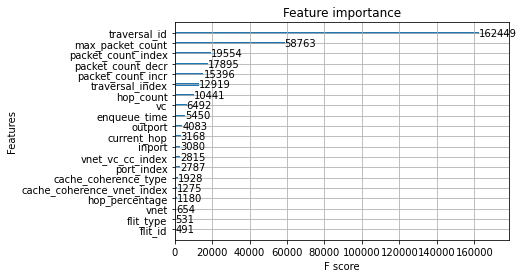

In [69]:
plot_importance(xgbc)
plt.show()

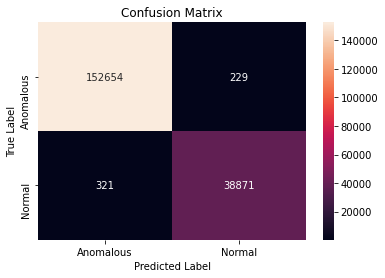

In [70]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [71]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152883
           1       0.99      0.99      0.99     39192

    accuracy                           1.00    192075
   macro avg       1.00      1.00      1.00    192075
weighted avg       1.00      1.00      1.00    192075



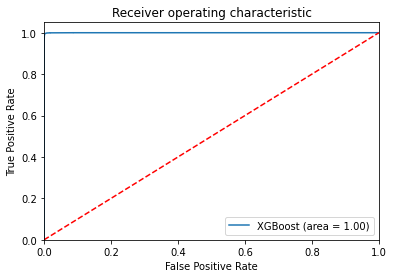

In [72]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()